# Covid Analysis

This is a analysis about covid and build a prediction model


## Import library


In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## About Data


In [186]:
df = pd.read_csv("Covid Data.csv")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


## Study about dataset


sex: 1 for female and 2 for male. <br> <br>
age: of the patient.<br> <br>
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.<br> <br>
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.<br> <br>
pneumonia: whether the patient already have air sacs inflammation or not.<br> <br>
pregnancy: whether the patient is pregnant or not.<br> <br>
diabetes: whether the patient has diabetes or not.<br> <br>
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.<br> <br>
asthma: whether the patient has asthma or not.<br> <br>
inmsupr: whether the patient is immunosuppressed or not.<br> <br>
hypertension: whether the patient has hypertension or not.<br> <br>
cardiovascular: whether the patient has heart or blood vessels related disease.<br> <br>
renal chronic: whether the patient has chronic renal disease or not.<br> <br>
other disease: whether the patient has other disease or not.<br> <br>
obesity: whether the patient is obese or not.<br> <br>
tobacco: whether the patient is a tobacco user.<br> <br>
usmr: Indicates whether the patient treated medical units of the first, second or third level.<br> <br>
medical unit: type of institution of the National Health System that provided the care.<br> <br>
intubed: whether the patient was connected to the ventilator.<br> <br>
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.<br> <br>
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.<br> <br>


<b>1 means "yes" and 2 means "no"


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [188]:
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [189]:
df["DEAD"]= 1
df.loc[df["DATE_DIED"] == "9999-99-99", "DEAD"] = 2
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,7,97,2
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,1,2,2,2,2,2,7,2,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,7,97,2
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,2


## Preprocesing


In [190]:
df = df.drop(columns=["DATE_DIED"],axis=1)
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048571,1,13,2,2,2,2,51,97,2,2,...,2,1,2,2,2,2,2,7,2,2
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,2,2,2,2,2,7,97,2


In [191]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

[]

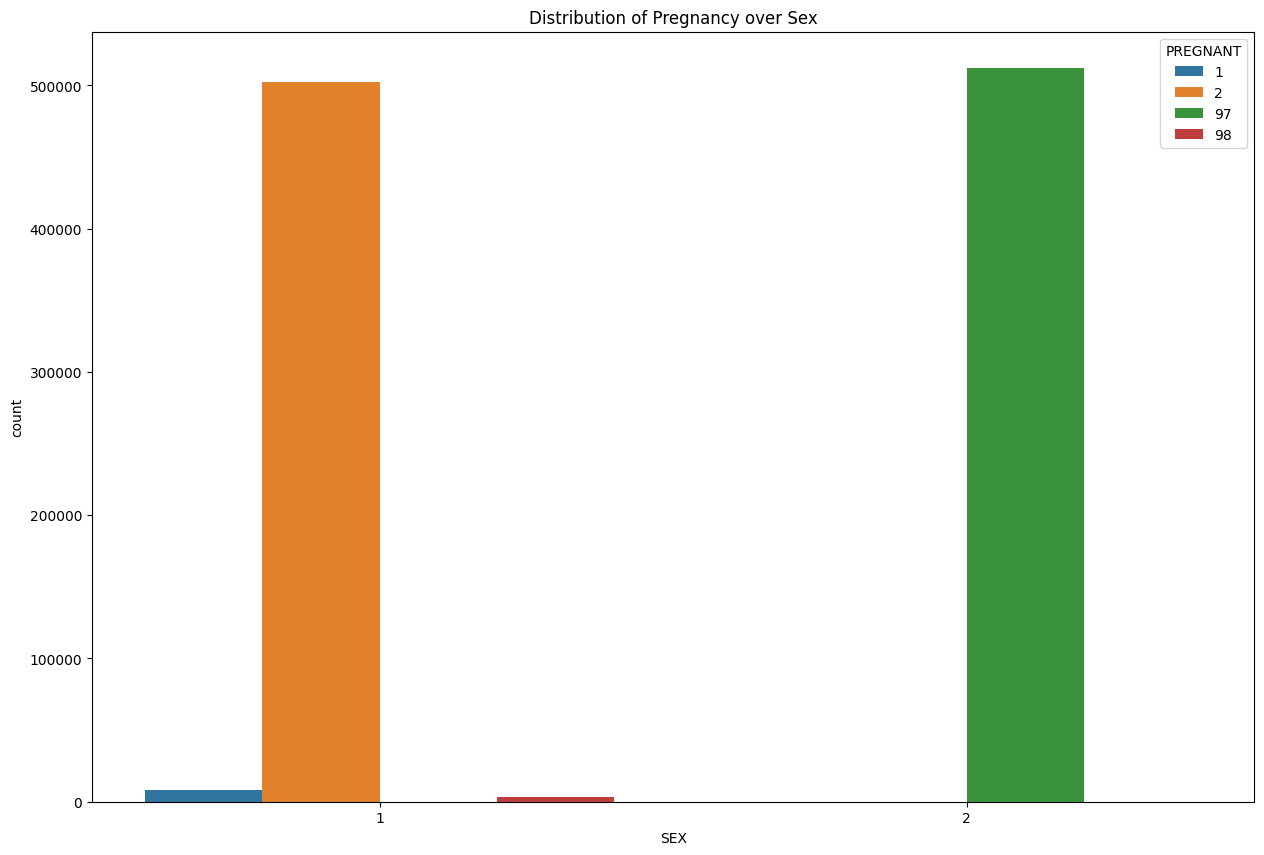

In [192]:
plt.figure(figsize=(15,10))
plt.title("Distribution of Pregnancy over Sex")
sns.countplot(data=df,x="SEX", hue="PREGNANT")
plt.plot()

So all of 97 are male, and male cannot pregnant, so we will fill 97 as 2, and drop 98


In [193]:
df.loc[df["PREGNANT"] == 97,"PREGNANT"] = 2

In [194]:
df = df[df["PREGNANT"] != 98]

In [195]:
for x in df.columns:
    print(x)
    print(df[x].value_counts())

USMER
USMER
2    656118
1    365859
Name: count, dtype: int64
MEDICAL_UNIT
MEDICAL_UNIT
12    589209
4     306967
6      37791
9      37142
3      18646
8      10091
10      7538
5       7049
11      5553
7        870
13       811
2        159
1        151
Name: count, dtype: int64
SEX
SEX
2    511936
1    510041
Name: count, dtype: int64
PATIENT_TYPE
PATIENT_TYPE
1    830385
2    191592
Name: count, dtype: int64
INTUBED
INTUBED
97    830385
2     156451
1      32988
99      2153
Name: count, dtype: int64
PNEUMONIA
PNEUMONIA
2    884614
1    137363
Name: count, dtype: int64
AGE
AGE
30     26456
31     25419
28     24735
29     24595
34     24406
       ...  
115        2
119        2
111        1
121        1
113        1
Name: count, Length: 121, dtype: int64
PREGNANT
PREGNANT
2    1014136
1       7841
Name: count, dtype: int64
DIABETES
DIABETES
2    899805
1    122172
Name: count, dtype: int64
COPD
COPD
2    1007619
1      14358
Name: count, dtype: int64
ASTHMA
ASTHMA
2    991561
1  

[]

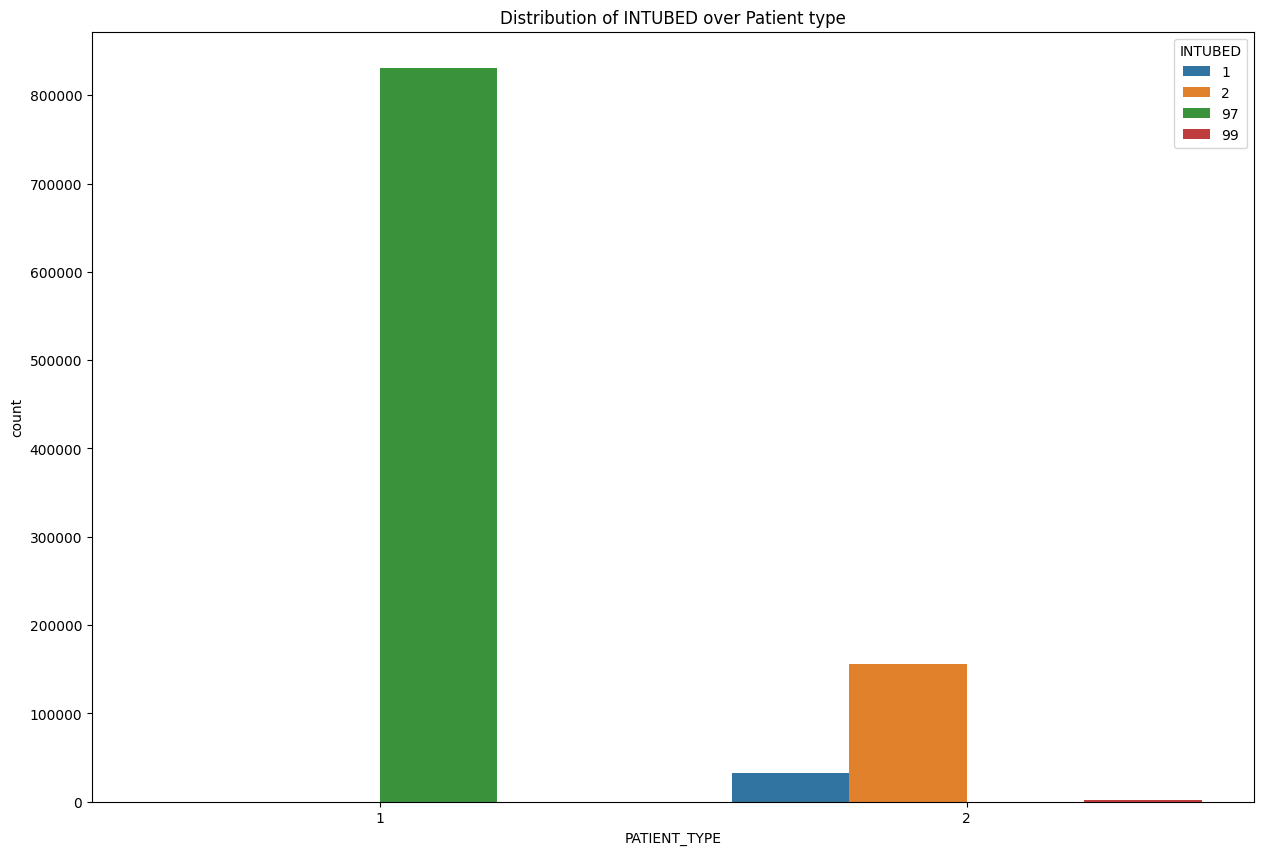

In [196]:
plt.figure(figsize=(15,10))
plt.title("Distribution of INTUBED over Patient type")
sns.countplot(data=df,x="PATIENT_TYPE", hue="INTUBED")
plt.plot()

We can see that 97 are all the patient at home. So we will replace 97 to 2


In [197]:
df.loc[df["INTUBED"] == 97,"INTUBED"] = 2

In [198]:
df = df[df["INTUBED"] != 99]

In [199]:
for x in df.columns:
    print(x)
    print(df[x].value_counts())

USMER
USMER
2    655077
1    364747
Name: count, dtype: int64
MEDICAL_UNIT
MEDICAL_UNIT
12    587923
4     306510
6      37697
9      36983
3      18569
8      10072
10      7511
5       7045
11      5541
7        856
13       808
2        158
1        151
Name: count, dtype: int64
SEX
SEX
2    510689
1    509135
Name: count, dtype: int64
PATIENT_TYPE
PATIENT_TYPE
1    830385
2    189439
Name: count, dtype: int64
INTUBED
INTUBED
2    986836
1     32988
Name: count, dtype: int64
PNEUMONIA
PNEUMONIA
2    883275
1    136549
Name: count, dtype: int64
AGE
AGE
30     26436
31     25386
28     24709
29     24575
32     24376
       ...  
115        2
119        2
111        1
121        1
113        1
Name: count, Length: 121, dtype: int64
PREGNANT
PREGNANT
2    1011994
1       7830
Name: count, dtype: int64
DIABETES
DIABETES
2    898249
1    121575
Name: count, dtype: int64
COPD
COPD
2    1005542
1      14282
Name: count, dtype: int64
ASTHMA
ASTHMA
2    989492
1     30332
Name: count, dtype:

[]

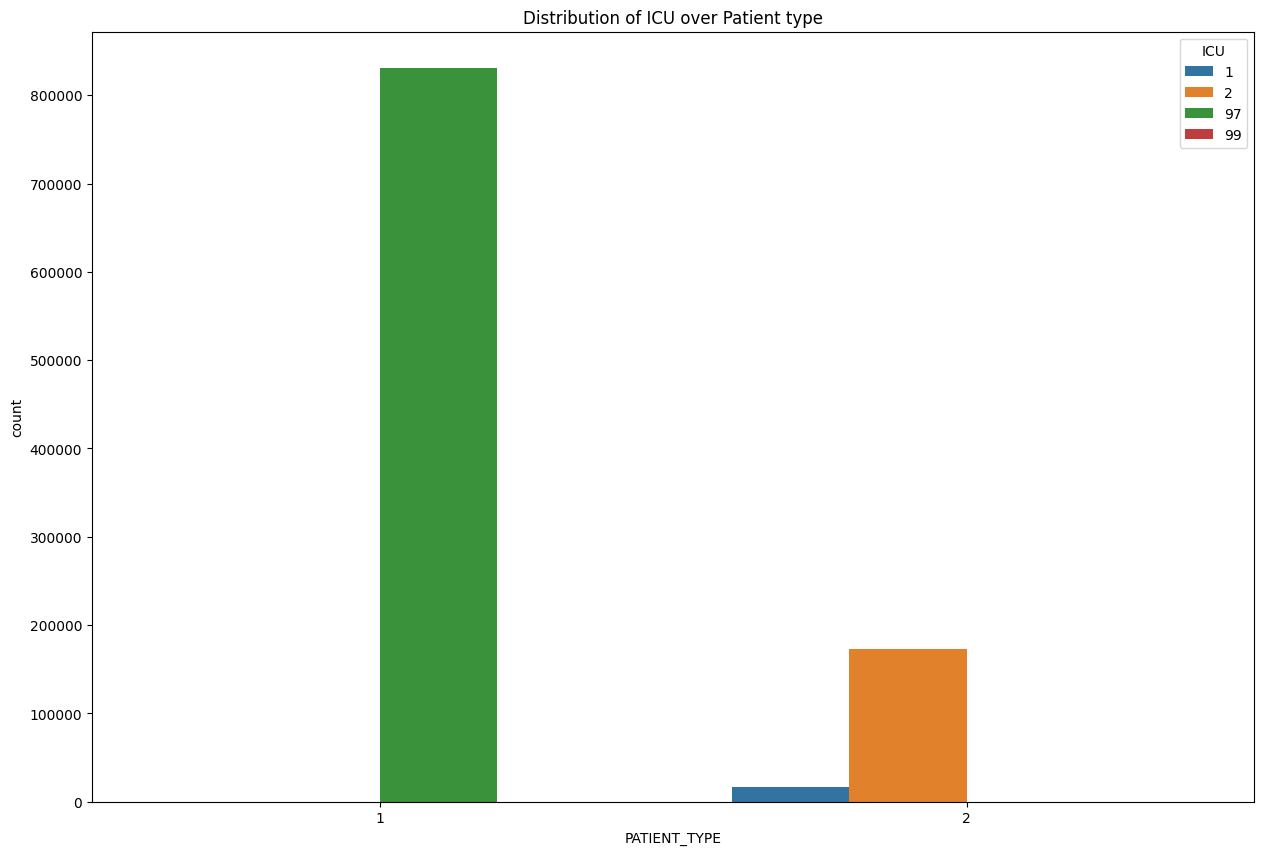

In [200]:
plt.figure(figsize=(15,10))
plt.title("Distribution of ICU over Patient type")
sns.countplot(data=df,x="PATIENT_TYPE", hue="ICU")
plt.plot()

We can see that 97 are all the patient at home. So we will replace 97 to 2


In [201]:
df.loc[df["ICU"] == 97,"ICU"] = 2
df = df[df["ICU"] != 99]

In [202]:
for x in df.columns:
    print(x)
    print(df[x].value_counts())

USMER
USMER
2    655076
1    364590
Name: count, dtype: int64
MEDICAL_UNIT
MEDICAL_UNIT
12    587800
4     306502
6      37675
9      36983
3      18566
8      10070
10      7511
5       7045
11      5541
7        856
13       808
2        158
1        151
Name: count, dtype: int64
SEX
SEX
2    510596
1    509070
Name: count, dtype: int64
PATIENT_TYPE
PATIENT_TYPE
1    830385
2    189281
Name: count, dtype: int64
INTUBED
INTUBED
2    986730
1     32936
Name: count, dtype: int64
PNEUMONIA
PNEUMONIA
2    883254
1    136412
Name: count, dtype: int64
AGE
AGE
30     26435
31     25386
28     24708
29     24574
32     24375
       ...  
115        2
119        2
111        1
121        1
113        1
Name: count, Length: 121, dtype: int64
PREGNANT
PREGNANT
2    1011838
1       7828
Name: count, dtype: int64
DIABETES
DIABETES
2    898137
1    121529
Name: count, dtype: int64
COPD
COPD
2    1005398
1      14268
Name: count, dtype: int64
ASTHMA
ASTHMA
2    989337
1     30329
Name: count, dtype:

In [203]:
df.loc[df["CLASIFFICATION_FINAL"] <= 3,"CLASIFFICATION_FINAL"] = 1
df.loc[df["CLASIFFICATION_FINAL"] >= 4,"CLASIFFICATION_FINAL"] = 2

In [204]:
for x in df.columns:
    print(x)
    print(df[x].value_counts())

USMER
USMER
2    655076
1    364590
Name: count, dtype: int64
MEDICAL_UNIT
MEDICAL_UNIT
12    587800
4     306502
6      37675
9      36983
3      18566
8      10070
10      7511
5       7045
11      5541
7        856
13       808
2        158
1        151
Name: count, dtype: int64
SEX
SEX
2    510596
1    509070
Name: count, dtype: int64
PATIENT_TYPE
PATIENT_TYPE
1    830385
2    189281
Name: count, dtype: int64
INTUBED
INTUBED
2    986730
1     32936
Name: count, dtype: int64
PNEUMONIA
PNEUMONIA
2    883254
1    136412
Name: count, dtype: int64
AGE
AGE
30     26435
31     25386
28     24708
29     24574
32     24375
       ...  
115        2
119        2
111        1
121        1
113        1
Name: count, Length: 121, dtype: int64
PREGNANT
PREGNANT
2    1011838
1       7828
Name: count, dtype: int64
DIABETES
DIABETES
2    898137
1    121529
Name: count, dtype: int64
COPD
COPD
2    1005398
1      14268
Name: count, dtype: int64
ASTHMA
ASTHMA
2    989337
1     30329
Name: count, dtype:

## Patient Analysis


Age Distribution


[]

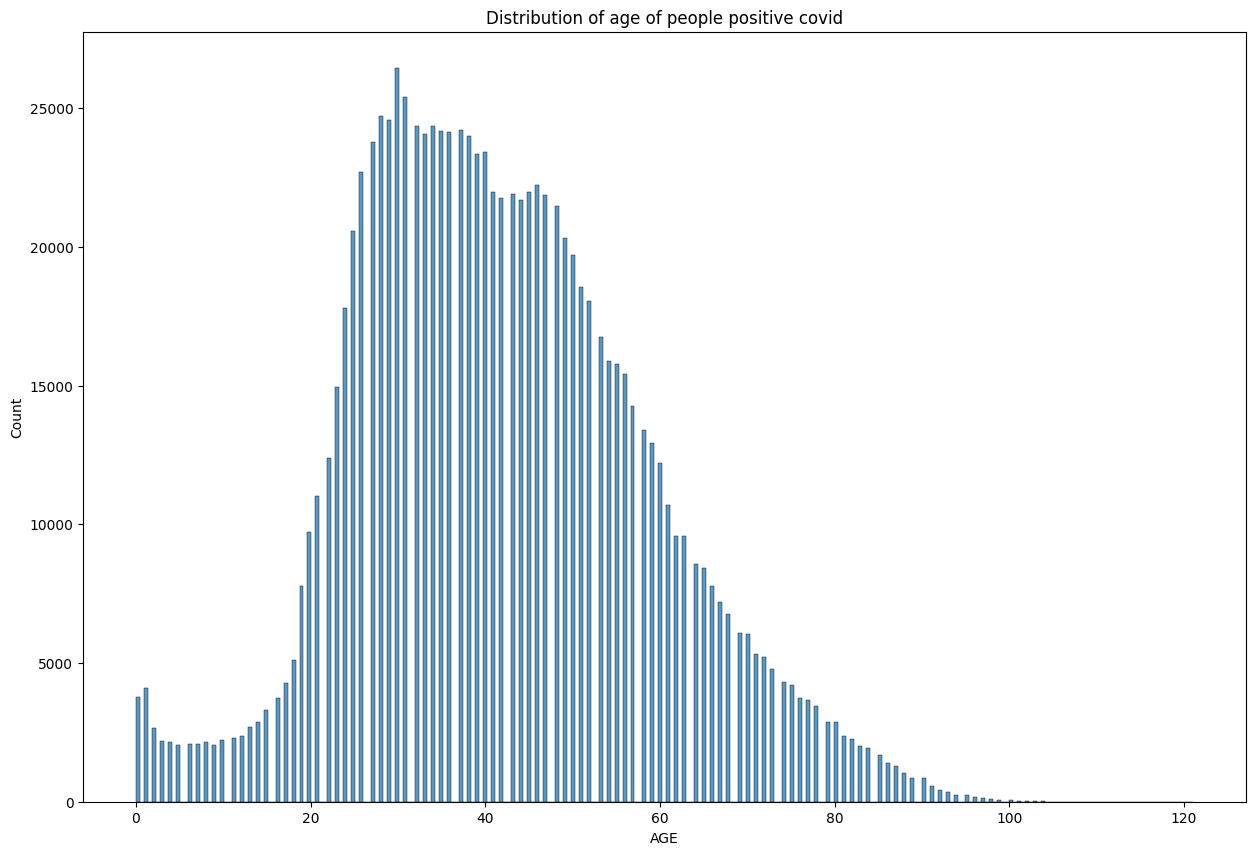

In [205]:
plt.figure(figsize=(15,10))
plt.title("Distribution of age of people positive covid")
sns.histplot(data=df, x="AGE")
plt.plot()

Most of people from 30 to 50 caught COVID


[]

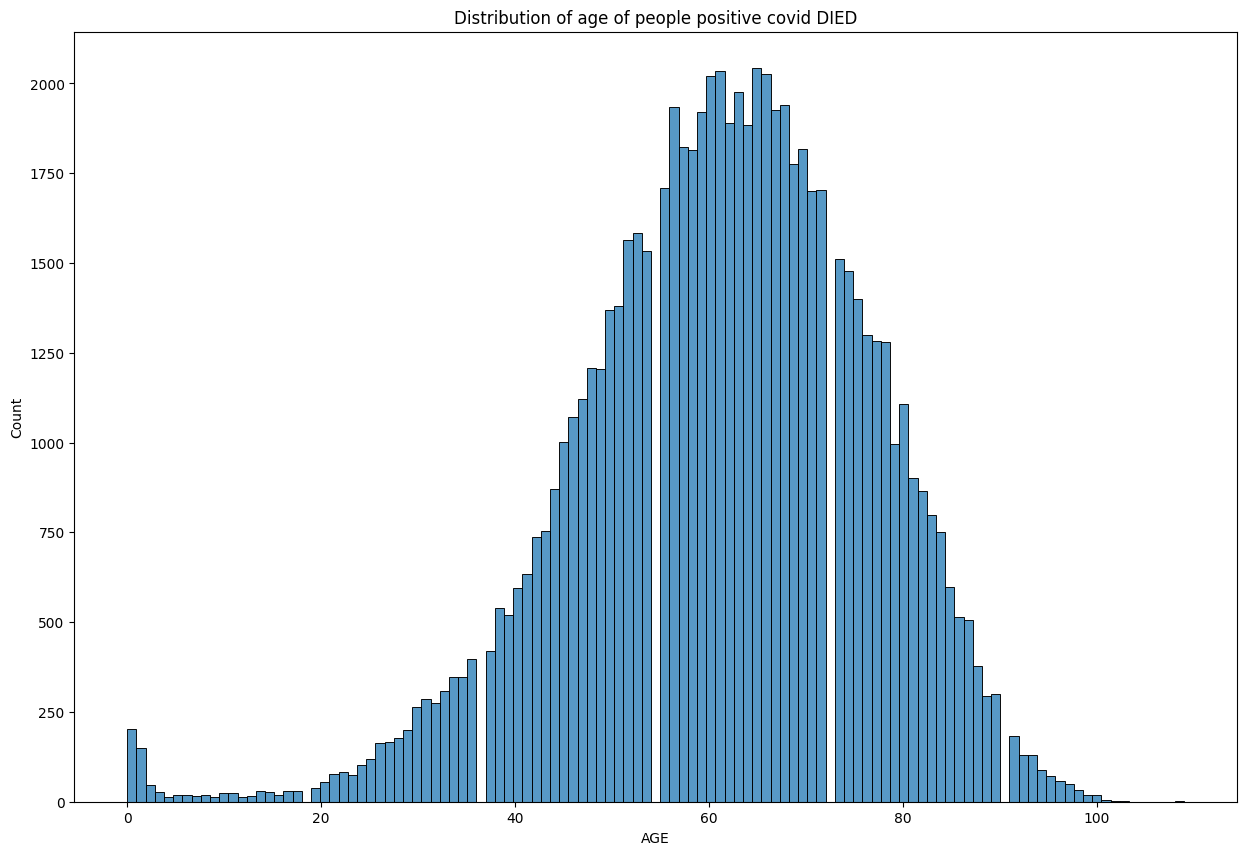

In [206]:
plt.figure(figsize=(15,10))
plt.title("Distribution of age of people positive covid DIED")
sns.histplot(data=df[df["DEAD"] == 1], x="AGE")
plt.plot()

The amount of people died before 20 is not high. But most of people caught COVID and died focus on 40+ to 80 years old


1 is dead, 2 is not dead

DEAD Percentage: 7.1896%


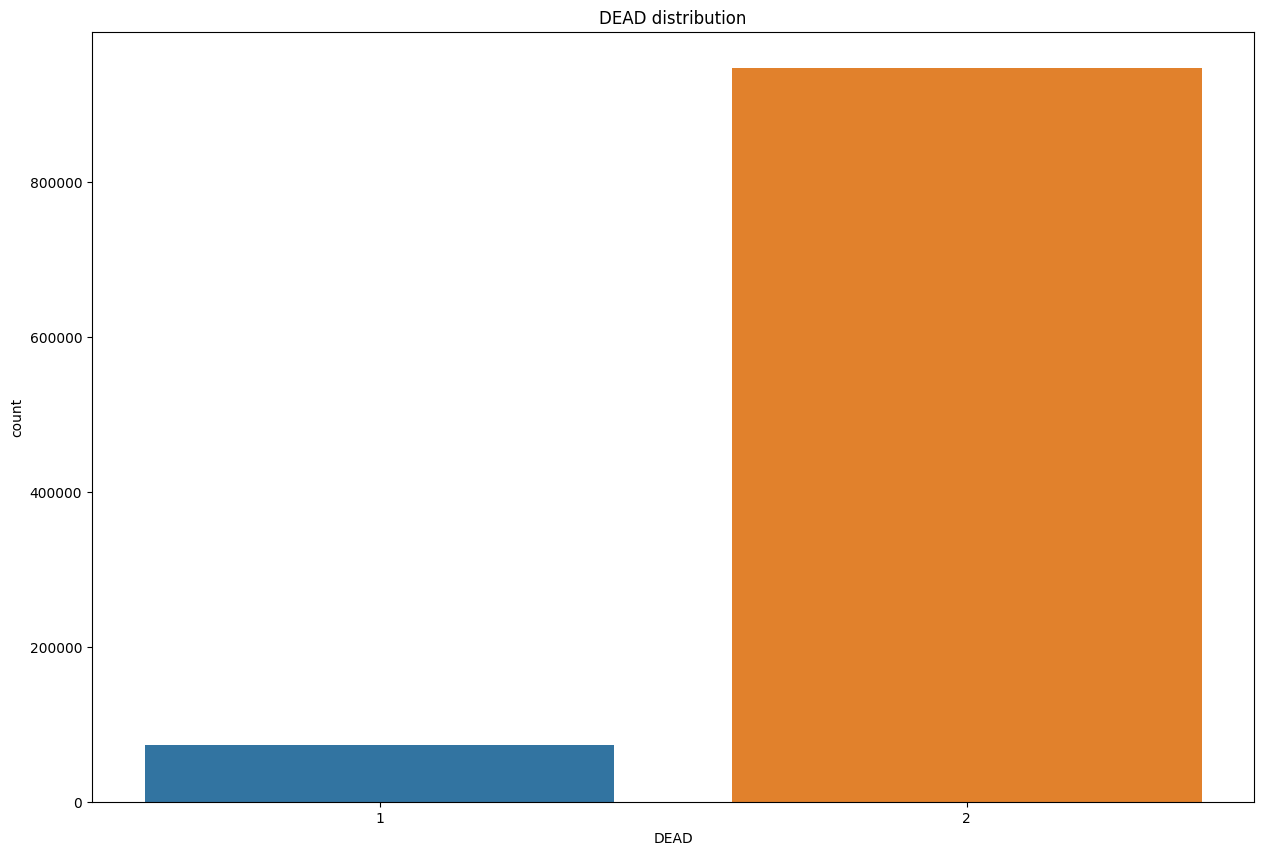

In [207]:
plt.figure(figsize=(15,10))
plt.title("DEAD distribution")
sns.countplot(data=df,x="DEAD")
plt.plot()
print("1 is dead, 2 is not dead")
print("")
print("DEAD Percentage: {0}%".format(round(df[df["DEAD"] == 1]["DEAD"].count() / df["DEAD"].count()*100,4)))

1 for female and 2 for male


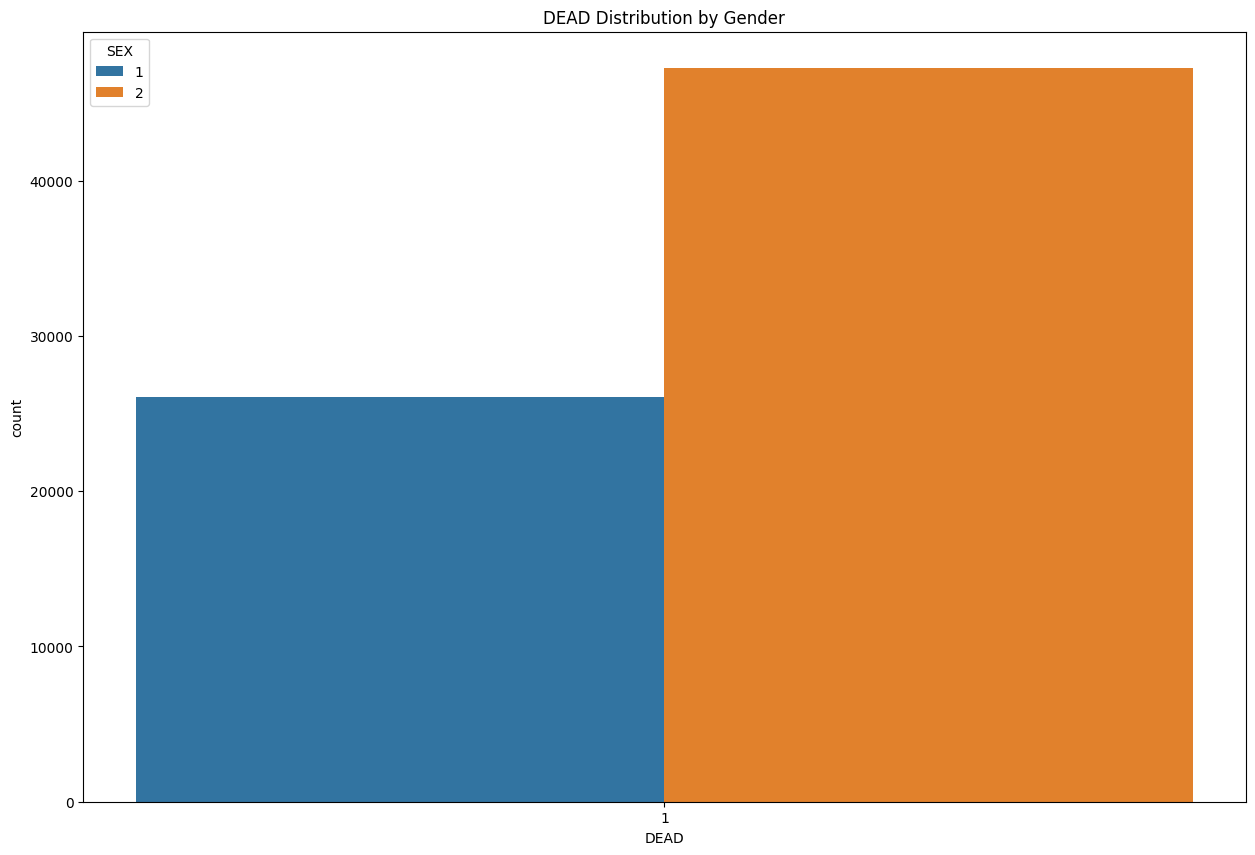

In [208]:
plt.figure(figsize=(15,10))
plt.title("DEAD Distribution by Gender")
sns.countplot(data=df[df["DEAD"] == 1],x="DEAD",hue="SEX")
plt.plot()
print("1 for female and 2 for male")

Looks like men are dead by COVID more than women


Let's see other factor that cause could be passively cause death like: pregnancy, diabetes, Chronic obstructive pulmonary, asthma, immunosuppressed, ...


In [209]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')

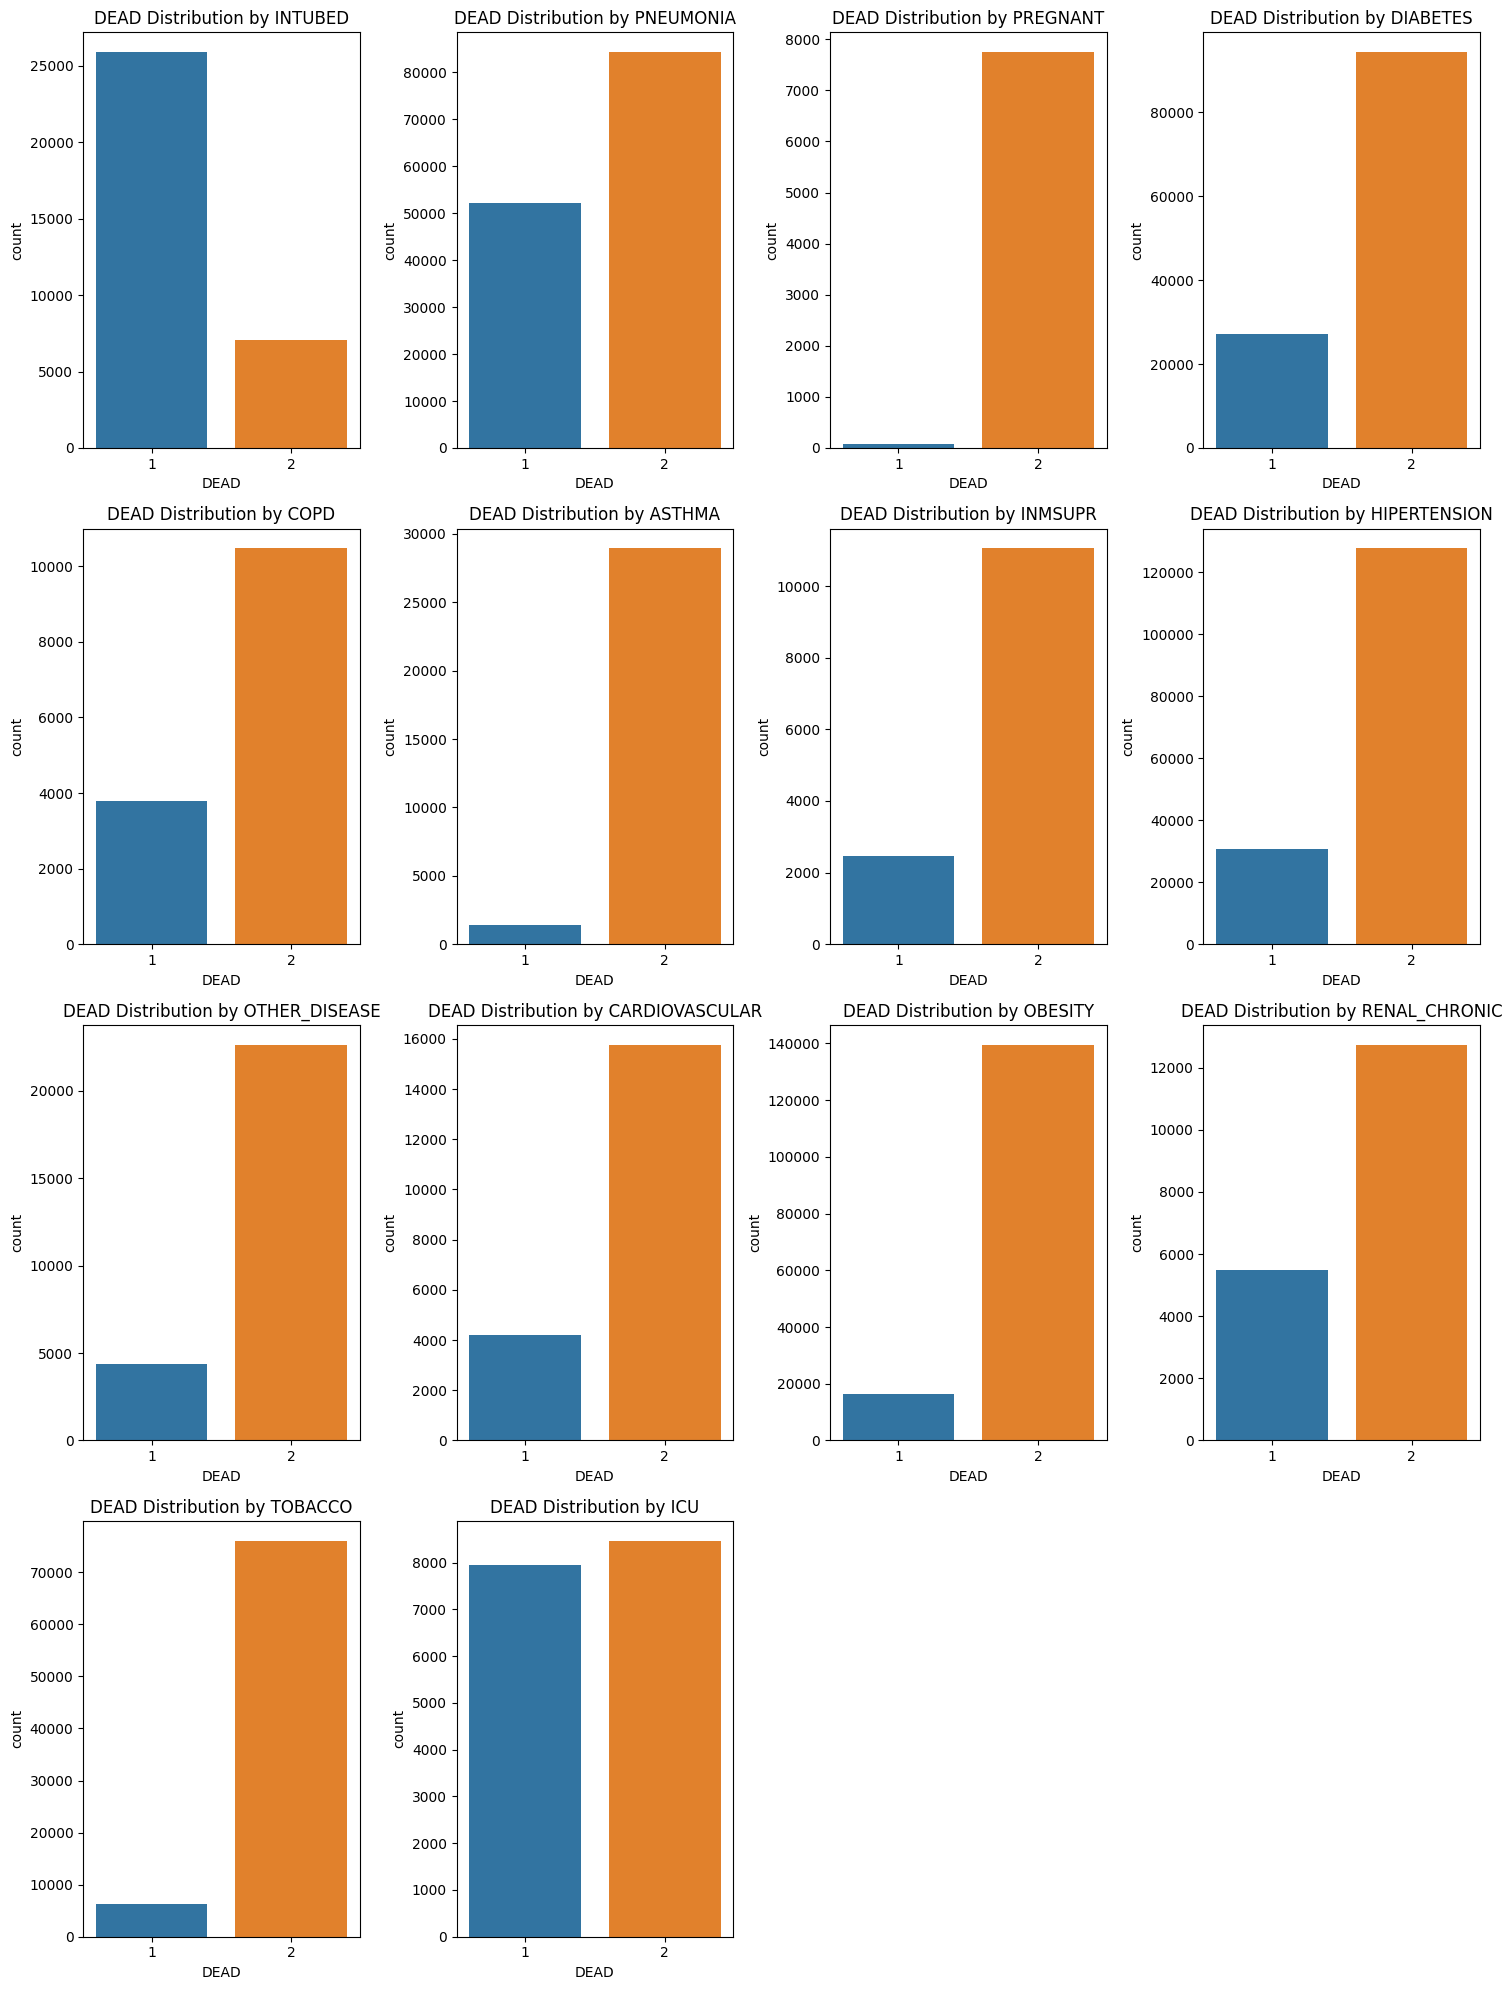

In [210]:
analysis_arr = ['INTUBED',
       'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU']
plt.figure(figsize=(15,20))
for i,x in enumerate(analysis_arr,1):
       plt.subplot(4,4,i)
       plt.title(f"DEAD Distribution by {x}")
       sns.countplot(data=df[df[x] == 1],x="DEAD")
       plt.tight_layout()
       plt.plot()

The number of dead <b>intubated</b> patients is really high compare to the number of alive intubated patients <br> <br>
The number of <b> Pneumonia</b> patients which were dead is high but not get over the number of alive pneumonia patients <br> <br>
<b>ICU</b> maybe also is a potential factors that cause death. <br> <br>
Factors like <b>Renal_Chronic and COPD</b> have a high chances that cause death <br> <br>
Other factors like: <b>diabetes, INMSUPR, Hypertension, CardioVascular, obesity</b> could have some effect that cause death.


In [211]:
df.corr()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
USMER,1.000000,0.125205,-0.002681,-0.187898,0.077538,0.150356,-0.057367,-0.001617,0.058198,0.024012,...,0.014627,0.055067,0.022628,0.019568,0.009505,0.040087,-0.015771,0.028567,0.034885,0.117652
MEDICAL_UNIT,0.125205,1.000000,0.002189,-0.213967,0.101928,0.110537,-0.086866,-0.001003,0.073539,0.036530,...,0.031113,0.093255,0.118623,0.027241,0.027656,0.062340,-0.011117,0.064939,-0.016638,0.154952
SEX,-0.002681,0.002189,1.000000,0.089124,-0.053212,-0.079599,0.028897,0.088089,-0.010803,-0.002827,...,0.007195,-0.002912,0.023191,-0.011086,0.018124,-0.013612,-0.101770,-0.053960,-0.034399,-0.079927
PATIENT_TYPE,-0.187898,-0.213967,0.089124,1.000000,-0.382668,-0.653852,0.321520,-0.009793,-0.256743,-0.115497,...,-0.091631,-0.232981,-0.092001,-0.103007,-0.063692,-0.149064,-0.004801,-0.189745,-0.267860,-0.517813
INTUBED,0.077538,0.101928,-0.053212,-0.382668,1.000000,0.338900,-0.167783,-0.009841,0.123635,0.045767,...,0.033468,0.118642,0.041532,0.046188,0.041483,0.061615,0.006082,0.123620,0.374589,0.504964
PNEUMONIA,0.150356,0.110537,-0.079599,-0.653852,0.338900,1.000000,-0.280040,-0.014927,0.216187,0.092937,...,0.063057,0.191056,0.054273,0.080918,0.071827,0.105354,0.011270,0.192105,0.259865,0.471531
AGE,-0.057367,-0.086866,0.028897,0.321520,-0.167783,-0.280040,1.000000,0.072419,-0.330511,-0.164516,...,-0.033461,-0.390492,-0.039912,-0.131351,-0.086751,-0.100896,-0.011577,-0.150994,-0.074548,-0.320703
PREGNANT,-0.001617,-0.001003,0.088089,-0.009793,-0.009841,-0.014927,0.072419,1.000000,-0.024552,-0.008278,...,-0.001750,-0.030627,0.014190,-0.009115,-0.018008,-0.009404,-0.018774,-0.005191,0.003307,-0.021001
DIABETES,0.058198,0.073539,-0.010803,-0.256743,0.123635,0.216187,-0.330511,-0.024552,1.000000,0.095950,...,0.053481,0.377327,0.032418,0.107783,0.115632,0.166028,0.013086,0.093788,0.073355,0.215750
COPD,0.024012,0.036530,-0.002827,-0.115497,0.045767,0.092937,-0.164516,-0.008278,0.095950,1.000000,...,0.054577,0.116422,0.036209,0.108304,0.038645,0.065172,0.063660,0.010506,0.025905,0.089570


Text(0.5, 1.0, 'Correlation plot Between Features')

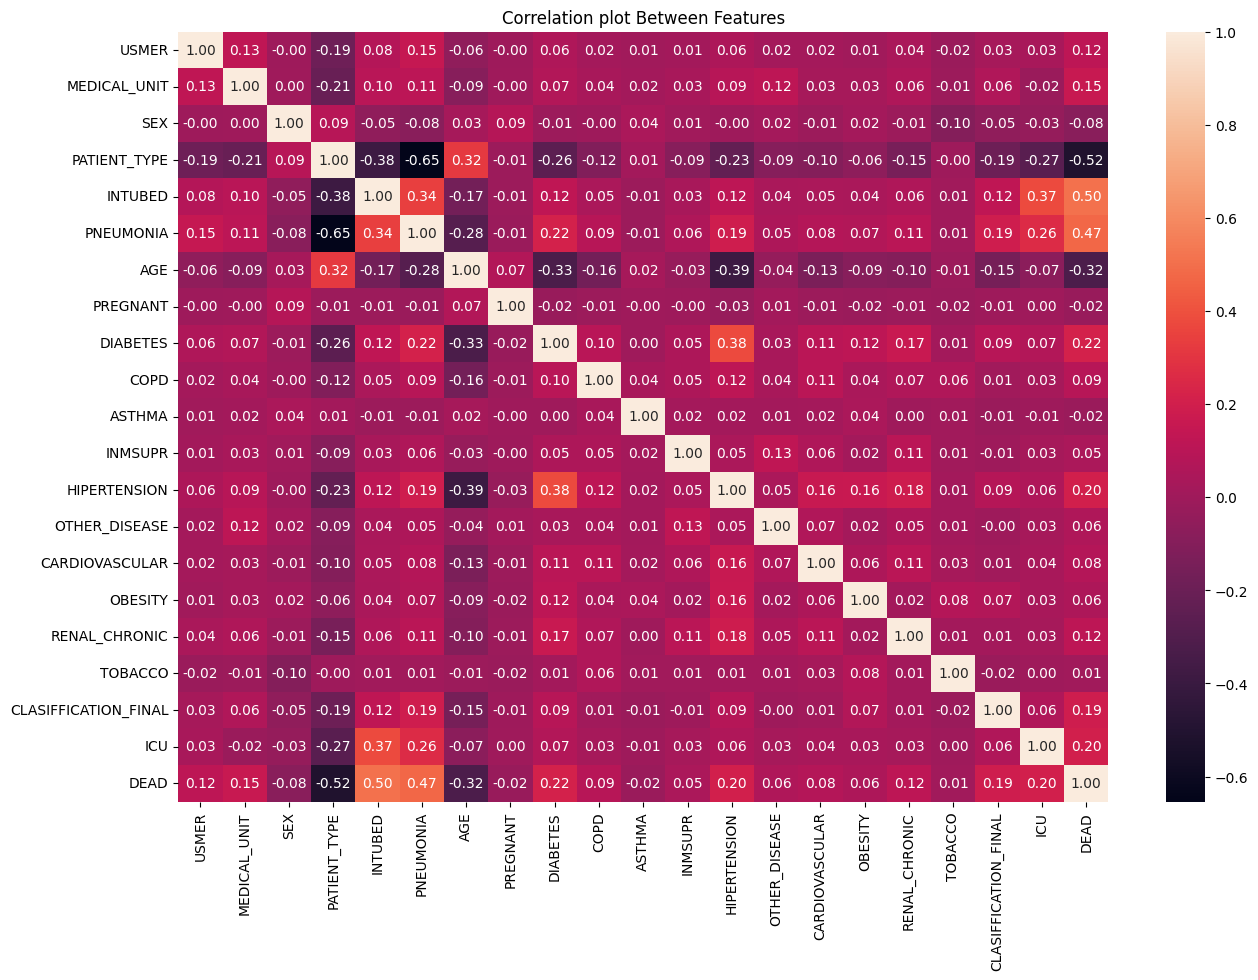

In [212]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation plot Between Features")

INTUBEDED and PNEUMONIA have a really high correlation (0.47 - 0.5), so we will consider droping these columns.


## Modeling


In [213]:
X = df[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']]
y = df["DEAD"]

In [214]:
df=df.drop(columns=["INTUBED", "PNEUMONIA"],axis=1)

### Logistic Regression


In [215]:
feature_col_nontree=df.columns.to_list()
feature_col_nontree.remove("DEAD")


kf = KFold(n_splits=10, shuffle=True, random_state=11)
for i, (train, test) in enumerate(kf.split(df)):
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    X_test = X.iloc[test]
    
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("Fold {i}: ")
    print(classification_report(y_pred=y_pred, y_true=y_test))
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print("Accuracy score: {0}".format(acc))
    